In [11]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Exploratory Analysis of New York Crime Data
---

Given the difficulty had in properly modelling this data, and with the ongoing goal of analyzing what can be learned by crime data in the city of New York, this notebook will conduct an unsupervised model of the data, in the hopes of identifying important trends for follow up studies to be built around.

### Method of Analysis
---
- Using unsupervised modelling, cluster the data into relevant groups

- If sufficient silhouette score are achieved, pass these labels into the original dataframe and conduct EDA

- Report findings of any trends

**NOTE: As this is purely exploratory analysis, there can be no definitive conclusions drawn from these findings. At best, these results will serve as a guide to imortant next steps in achieving better results in follow up data collection.**

## Reading in Data
---

In [2]:
df = pd.read_csv('complaints_2018_final.csv')

In [3]:
df.cmplnt_fr_dt = df.cmplnt_fr_dt.apply(lambda x: pd.to_datetime(x))

In [4]:
df['dayofweek'] = df.cmplnt_fr_dt.apply(lambda x: x.day_name())
df['month'] = df.cmplnt_fr_dt.apply(lambda x: x.month)

In [5]:
df.head()

,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,rpt_dt,ky_cd,ofns_desc,pd_cd,pd_desc,law_cat_cd,boro_nm,...,county,zipcodes,adjusted_gross_income_(agi),avg_agi,total_income_amount,avg_total_income,taxable_income_amount,avg_taxable_income,dayofweek,month
0,453608592,2018-12-21,10:00 AM,2019-01-02,341,petit_larceny,338,larceny_petit_from_building_un,misdemeanor,manhattan,...,New York,10002.0,2002349.0,46.126446,2033619.0,46.846786,1347603.0,52.867909,Friday,12
1,878647334,2018-10-17,14:30 PM,2019-01-15,341,petit_larceny,349,larceny_petit_of_license_plate,misdemeanor,queens,...,Queens,11385.0,1929001.0,40.653340,1948325.0,41.060590,1141610.0,34.149267,Wednesday,10
2,128026914,2018-12-24,20:00 PM,2019-01-02,341,petit_larceny,349,larceny_petit_of_license_plate,misdemeanor,bronx,...,Bronx,10464.0,163217.0,76.269626,165381.0,77.280841,116220.0,66.034091,Monday,12
3,997752766,2018-09-17,07:00 AM,2019-01-07,112,theft_fraud,739,fraud_unclassified_felony,felony,brooklyn,...,Kings,11204.0,1606891.0,50.499403,1629709.0,51.216499,902117.0,47.680603,Monday,9
4,746011851,2018-09-04,10:00 AM,2019-12-09,116,sex_crimes,168,sodomy_1,felony,bronx,...,Bronx,10467.0,1357285.0,31.616236,1368864.0,31.885954,710802.0,25.819179,Tuesday,9


In [13]:
df.columns

Index(['cmplnt_num', 'cmplnt_fr_dt', 'cmplnt_fr_tm', 'rpt_dt', 'ky_cd',
       'ofns_desc', 'pd_cd', 'pd_desc', 'law_cat_cd', 'boro_nm',
       'prem_typ_desc', 'susp_age_group', 'susp_race', 'susp_sex', 'latitude',
       'longitude', 'patrol_boro', 'vic_age_group', 'vic_race', 'vic_sex',
       'population', 'area', 'county', 'zipcodes',
       'adjusted_gross_income_(agi)', 'avg_agi', 'total_income_amount',
       'avg_total_income', 'taxable_income_amount', 'avg_taxable_income'],
      dtype='object')

## Unsupervised Models
---

In [6]:
#What I plan to dummy later, since they are object type data
morons = ['ofns_desc','pd_desc', 'law_cat_cd', 'boro_nm',
       'prem_typ_desc', 'susp_age_group', 'susp_race', 'susp_sex','patrol_boro', 'vic_age_group', 'vic_race', 'vic_sex',
       'population', 'area', 'county', 'zipcodes','dayofweek']

In [ ]:
#This is commented out because of the massive amount of time involved in analyzing the complete dataset

# X = df.drop(columns = ['cmplnt_num','cmplnt_fr_dt', 'cmplnt_fr_tm', 'rpt_dt'])
# X = pd.get_dummies(X, columns = morons, drop_first = True)

In [7]:
sc = StandardScaler()
#Z = sc.fit_transform(X)

In [8]:
#Adjustable code that will allow for different low/high values to test for best clusters in a KMeans
def elbow(Z, low = 2, high = 8):
    things = []
    for clusters in range(low, high):
        kmeans = KMeans(n_clusters=clusters,
                        random_state=42)
        kmeans.fit(Z)
        things.append(kmeans.inertia_)

    plt.plot(list(range(low, high)), things, marker='o')
    plt.title('The Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Sum of Squared Distance from Centroid')

In [30]:
%%time
km = KMeans(n_clusters = 3)
km.fit(Z)

CPU times: user 43min 50s, sys: 2h 1min 55s, total: 2h 45min 46s
Wall time: 5h 20min 27s


KMeans(n_clusters=3)

This data is simply too large to analyze under time contraints. I will have to settle for sampling a small subset of the data.

## Subset Analysis
---

In [9]:
sample = df.sample(frac = .20)

In [10]:
X = sample.drop(columns = ['cmplnt_num','cmplnt_fr_dt', 'cmplnt_fr_tm', 'rpt_dt'])
X = pd.get_dummies(X, columns = morons, drop_first = True)

Z = sc.fit_transform(X)

CPU times: user 10min 30s, sys: 40.8 s, total: 11min 11s
Wall time: 3min 6s


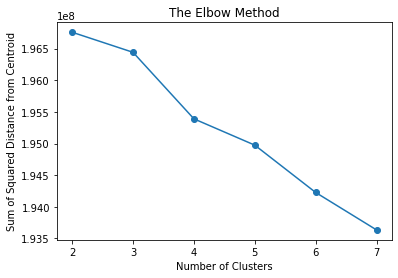

In [50]:
%%time
elbow(Z)

CPU times: user 13min 5s, sys: 28.6 s, total: 13min 34s
Wall time: 3min 20s


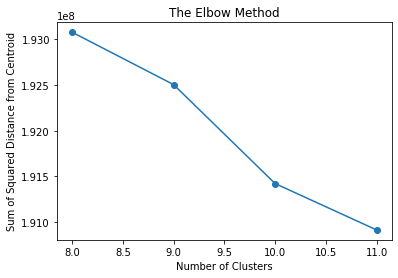

In [52]:
%%time
elbow(Z, low = 8, high = 12)

It looks like there's not one good option to use here. I'll try 4 and 5.

In [51]:
%%time
km = KMeans(n_clusters = 4)
km.fit(Z)

CPU times: user 1min 34s, sys: 6.31 s, total: 1min 40s
Wall time: 29.1 s


KMeans(n_clusters=4)

In [53]:
silhouette_score(Z, km.labels_)

0.0055640868596016696

In [54]:
km = KMeans(n_clusters = 5)
km.fit(Z)

KMeans(n_clusters=5)

In [56]:
silhouette_score(Z, km.labels_)

0.005407955459575741

It is beginning to appear that this analyis will simply be confirmation that this data has very little correlations to be found within it, which would explain the relatively poor performance of modelling in other notebooks.

## DBSCAN attempt
---

In [14]:
%%time
db = DBSCAN(eps = .2, min_samples = 5, n_jobs = -1)

db.fit(Z)

CPU times: user 10h 59min 8s, sys: 36.4 s, total: 10h 59min 44s
Wall time: 1h 27min 8s


DBSCAN(eps=0.2, n_jobs=-1)

In [16]:
labels = db.labels_
set(labels)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}

In [17]:
silhouette_score(Z, labels)

-0.2403206722800253

The clustering and DBscan scores are very bad on just the 

## Simplify the features with a PCA
---

In [100]:
Z.shape

(183491, 1075)

In [12]:
pca = PCA(n_components = 10)

In [16]:
%%time
simple = pca.fit_transform(Z)

CPU times: user 30.9 s, sys: 4.48 s, total: 35.4 s
Wall time: 10.9 s


In [20]:
simple.shape

(183491, 10)

In [21]:
simple[:1]

array([[ 0.30699858, -0.95691583, -1.37711602,  3.51225354,  2.32382636,
         1.14799967,  5.82435305, -1.25800534, -0.67943441, -0.849914  ]])

## Passing the PCA data into a K-Means Cluster
---

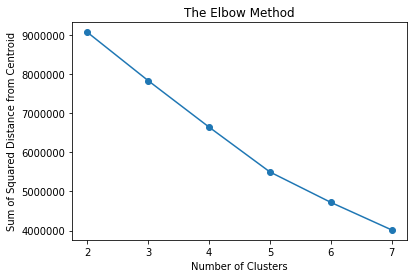

In [22]:
elbow(simple)

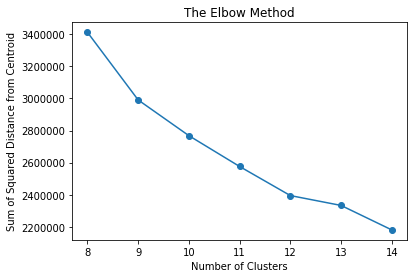

In [23]:
elbow(simple, low = 8, high = 15)

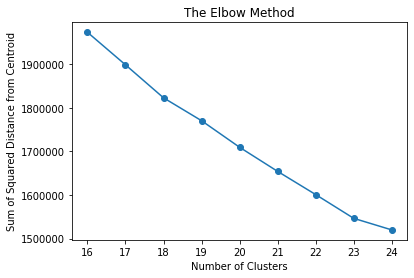

In [24]:
elbow(simple, low = 16, high = 25)

Looks like k = 12 and k = 13 may be helpful.

In [28]:
km = KMeans(n_clusters = 12)
km.fit(simple)

KMeans(n_clusters=12)

In [26]:
silhouette_score(simple, km.labels_)

0.3777002610879573

In [29]:
#This should be expected, actually - there's no reason to expand the silhouette score into a model it was not fit to.
silhouette_score(Z, km.labels_)

-0.04765971285650341

In [30]:
km = KMeans(n_clusters = 13)
km.fit(simple)

KMeans(n_clusters=13)

In [31]:
silhouette_score(simple, km.labels_)

0.3530427959738568

In [34]:
labels = km.labels_
labels.shape

(183491,)

In [37]:
labels[:2]

array([ 6, 12], dtype=int32)

These are much better results. It may be that some meaningful EDA can be carried out here!

## EDA on clusters - what (if anything) do they mean?
---

In [39]:
sample['cluster_num'] = labels

In [41]:
sample.head()

,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,rpt_dt,ky_cd,ofns_desc,pd_cd,pd_desc,law_cat_cd,boro_nm,...,zipcodes,adjusted_gross_income_(agi),avg_agi,total_income_amount,avg_total_income,taxable_income_amount,avg_taxable_income,dayofweek,month,cluster_num
468359,429868522,2018-12-21,22:00 PM,2019-01-30,361,off_agnst_pub_ord_sensblty_&,639,aggravated_harassment_2,misdemeanor,manhattan,...,10039.0,468538.0,34.965522,473199.0,35.313358,268858.0,30.448245,Friday,12,6
312106,188108430,2018-07-26,02:00 AM,2018-07-28,578,harrassment_2,638,harassment_subd_3_4_5,violation,brooklyn,...,11211.0,1791794.0,58.708847,1822086.0,59.701376,1283846.0,57.136004,Thursday,7,12
85157,791613704,2018-03-13,20:30 PM,2018-03-14,109,grand_larceny,457,larceny_grand_of_vehicular_motorcycle_accessories,felony,queens,...,11354.0,1008807.0,35.533885,1023869.0,36.064424,583770.0,37.808938,Tuesday,3,2
62483,327479634,2018-03-25,02:30 AM,2018-03-25,106,felony_assault,109,assault_2_1_unclassified,felony,bronx,...,10451.0,647933.0,29.094432,652966.0,29.320431,328360.0,23.674117,Sunday,3,11
103681,766479303,2018-04-04,18:00 PM,2018-04-05,341,petit_larceny,321,larceny_petit_from_auto,misdemeanor,brooklyn,...,11236.0,1837123.0,39.807649,1849528.0,40.076446,1000968.0,29.755291,Wednesday,4,5


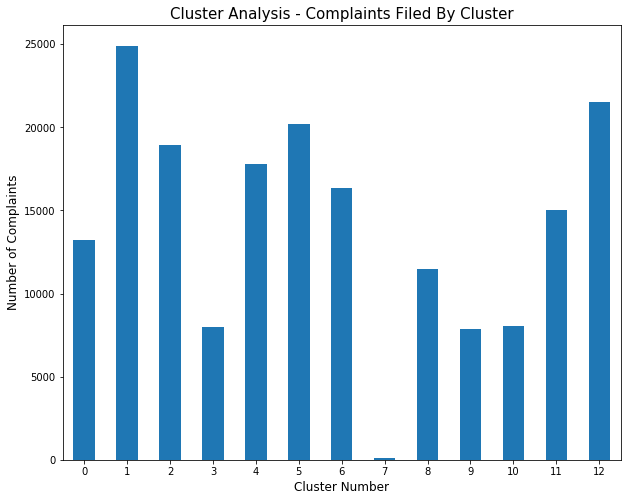

In [48]:
sample.groupby('cluster_num').cmplnt_num.count().plot.bar(rot = 0, figsize = (10, 8))
plt.title("Cluster Analysis - Complaints Filed By Cluster", fontsize = 15)
plt.xlabel('Cluster Number', fontsize = 12)
plt.ylabel('Number of Complaints', fontsize = 12);

Right away, it appears that almost no data was placed into cluster 7, while clusters 1 and 12 are the largest of the 13 clusters.

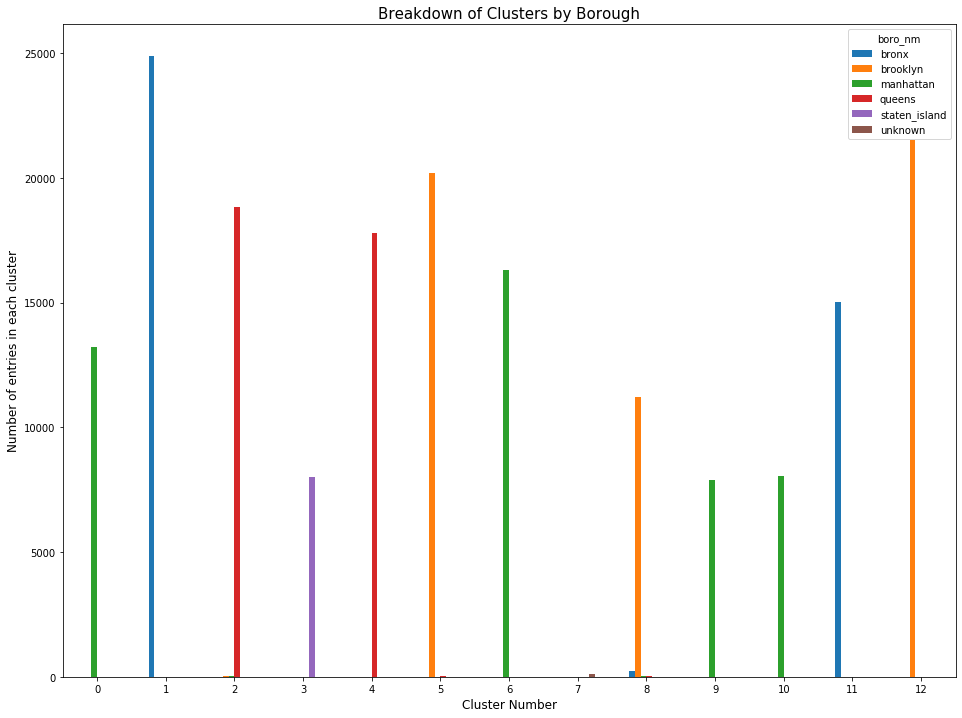

In [89]:
sample.groupby('cluster_num').boro_nm.value_counts().unstack().plot.bar(rot = 0, figsize = (16, 12))
plt.title('Breakdown of Clusters by Borough', fontsize = 15)
plt.xlabel('Cluster Number', fontsize = 12)
plt.ylabel('Number of entries in each cluster', fontsize = 12);

Interestingly, the predominant boroough in each cluster forms an identical distribution to the total number of complaints, indicating that very likely each cluster contains almost 100% of one borough, with almost 0% of any others.

In [90]:
sample.groupby('cluster_num').boro_nm.value_counts(normalize = True).unstack()

boro_nm,bronx,brooklyn,manhattan,queens,staten_island,unknown
cluster_num,,,,,,
0,NaN,0.000076,0.999849,0.000076,NaN,NaN
1,0.999719,0.000080,0.000120,0.000040,0.000040,NaN
2,NaN,0.002060,0.002166,0.995774,NaN,NaN
3,NaN,NaN,NaN,0.000125,0.999875,NaN
4,NaN,0.000561,0.000056,0.999326,NaN,0.000056
5,0.000148,0.999060,0.000049,0.000742,NaN,NaN
6,NaN,NaN,0.999816,0.000123,NaN,0.000061
7,NaN,NaN,NaN,NaN,NaN,1.000000
8,0.018820,0.976910,0.003050,0.001220,NaN,NaN


For the most part, clusters 1 and 11 pretty much exclusively deal witht the bronx, 5, 8, and 12 with brooklyn, 0, 6, 9 and 10 with manhattan, 2 and 4 with queens, 3 with staten_island, and 7 with the "Null" borough value.

For the most part, each cluster contains nearly 100% entries from a single borough (over 99%). This is very likely a major contributer to signal.

In [57]:
sample.head()

,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,rpt_dt,ky_cd,ofns_desc,pd_cd,pd_desc,law_cat_cd,boro_nm,...,zipcodes,adjusted_gross_income_(agi),avg_agi,total_income_amount,avg_total_income,taxable_income_amount,avg_taxable_income,dayofweek,month,cluster_num
468359,429868522,2018-12-21,22:00 PM,2019-01-30,361,off_agnst_pub_ord_sensblty_&,639,aggravated_harassment_2,misdemeanor,manhattan,...,10039.0,468538.0,34.965522,473199.0,35.313358,268858.0,30.448245,Friday,12,6
312106,188108430,2018-07-26,02:00 AM,2018-07-28,578,harrassment_2,638,harassment_subd_3_4_5,violation,brooklyn,...,11211.0,1791794.0,58.708847,1822086.0,59.701376,1283846.0,57.136004,Thursday,7,12
85157,791613704,2018-03-13,20:30 PM,2018-03-14,109,grand_larceny,457,larceny_grand_of_vehicular_motorcycle_accessories,felony,queens,...,11354.0,1008807.0,35.533885,1023869.0,36.064424,583770.0,37.808938,Tuesday,3,2
62483,327479634,2018-03-25,02:30 AM,2018-03-25,106,felony_assault,109,assault_2_1_unclassified,felony,bronx,...,10451.0,647933.0,29.094432,652966.0,29.320431,328360.0,23.674117,Sunday,3,11
103681,766479303,2018-04-04,18:00 PM,2018-04-05,341,petit_larceny,321,larceny_petit_from_auto,misdemeanor,brooklyn,...,11236.0,1837123.0,39.807649,1849528.0,40.076446,1000968.0,29.755291,Wednesday,4,5


In [60]:
sample.nunique()

cmplnt_num                     182967
cmplnt_fr_dt                      730
cmplnt_fr_tm                     1440
rpt_dt                            730
ky_cd                              62
ofns_desc                          59
pd_cd                             329
pd_desc                           320
law_cat_cd                          3
boro_nm                             6
prem_typ_desc                      75
susp_age_group                     16
susp_race                           7
susp_sex                            3
latitude                        49953
longitude                       50625
patrol_boro                         9
vic_age_group                       7
vic_race                            7
vic_sex                             5
population                        182
area                              187
county                              5
zipcodes                          182
adjusted_gross_income_(agi)       182
avg_agi                           182
total_income

In [93]:
df.avg_agi.nunique()

182

Note below: The "unknown" race value was fairly  evenly distributed through the clusters.

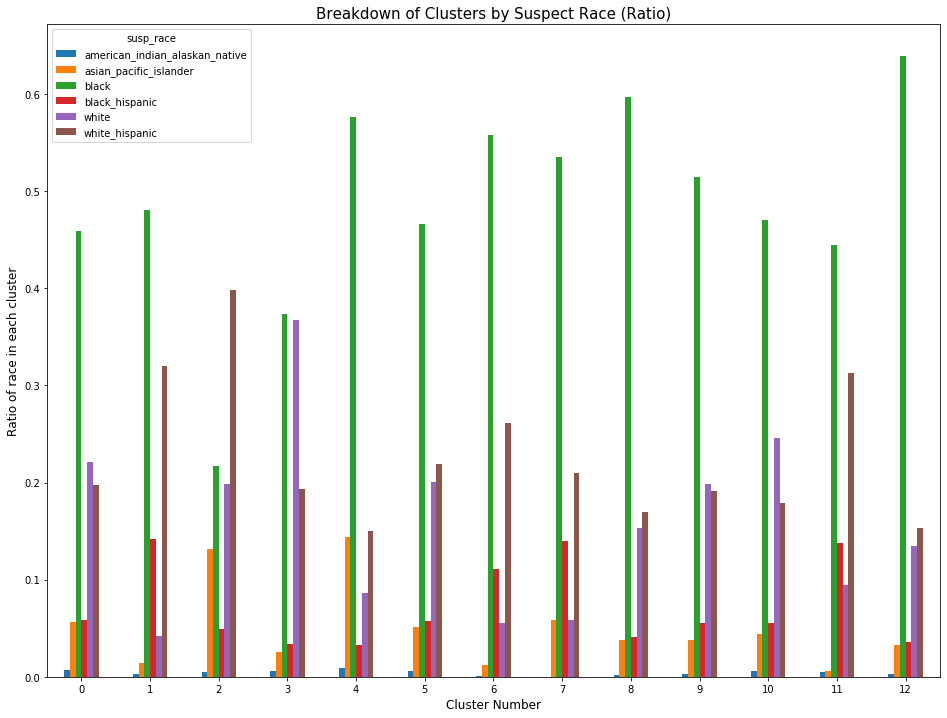

In [95]:
known_race = sample[sample.susp_race != 'unknown']
known_race.groupby('cluster_num').susp_race.value_counts(normalize = True).unstack().plot.bar(rot = 0, figsize = (16, 12))
plt.title('Breakdown of Clusters by Suspect Race (Ratio)', fontsize = 15)
plt.xlabel('Cluster Number', fontsize = 12)
plt.ylabel('Ratio of race in each cluster', fontsize = 12);

The distrubution of suspect race is almost the same for all clusters, so I do not think it was a significant contributer.

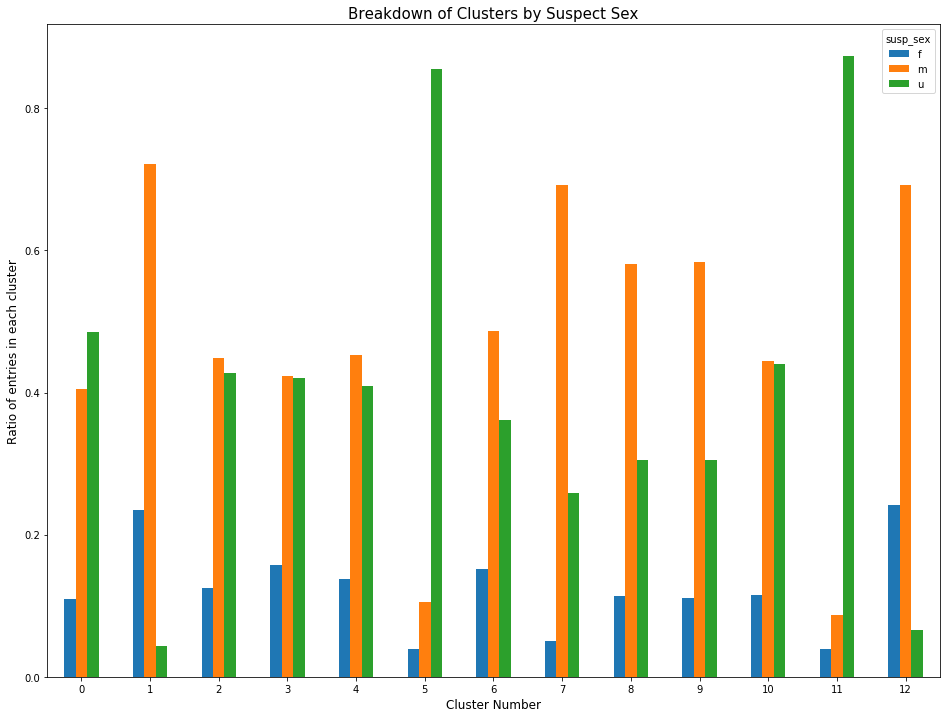

In [98]:
sample.groupby('cluster_num').susp_sex.value_counts(normalize = True).unstack().plot.bar(rot = 0, figsize = (16, 12))
plt.title('Breakdown of Clusters by Suspect Sex', fontsize = 15)
plt.xlabel('Cluster Number', fontsize = 12)
plt.ylabel('Ratio of entries in each cluster', fontsize = 12);

There are no clusters where female suspects outweigh the other classes, so this is unlikely to be a feature that was clustered upon. However, clusters 1, 5, 11 and 12 have very different ratios in their grouping of suspect sex, so it is possible this is still a valuable feature.

In [75]:
sample.columns

Index(['cmplnt_num', 'cmplnt_fr_dt', 'cmplnt_fr_tm', 'rpt_dt', 'ky_cd',
       'ofns_desc', 'pd_cd', 'pd_desc', 'law_cat_cd', 'boro_nm',
       'prem_typ_desc', 'susp_age_group', 'susp_race', 'susp_sex', 'latitude',
       'longitude', 'patrol_boro', 'vic_age_group', 'vic_race', 'vic_sex',
       'population', 'area', 'county', 'zipcodes',
       'adjusted_gross_income_(agi)', 'avg_agi', 'total_income_amount',
       'avg_total_income', 'taxable_income_amount', 'avg_taxable_income',
       'dayofweek', 'month', 'cluster_num'],
      dtype='object')

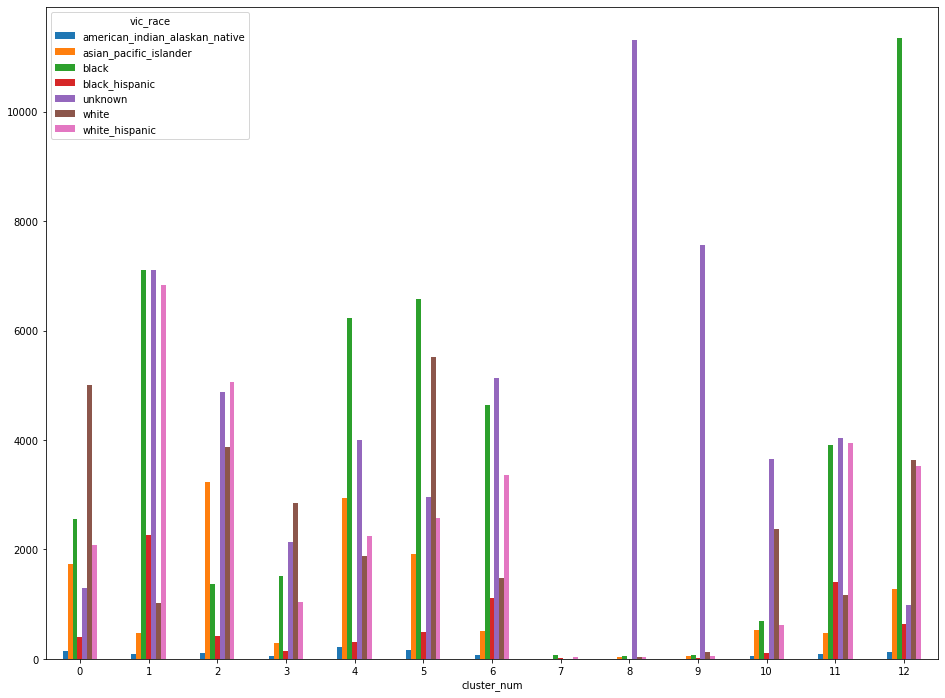

In [81]:
sample.groupby('cluster_num').vic_race.value_counts().unstack().plot.bar(rot = 0, figsize = (16, 12))

It certainly appears that cluster 8 and 9 heavily favor entries that do not have known victim race entries.

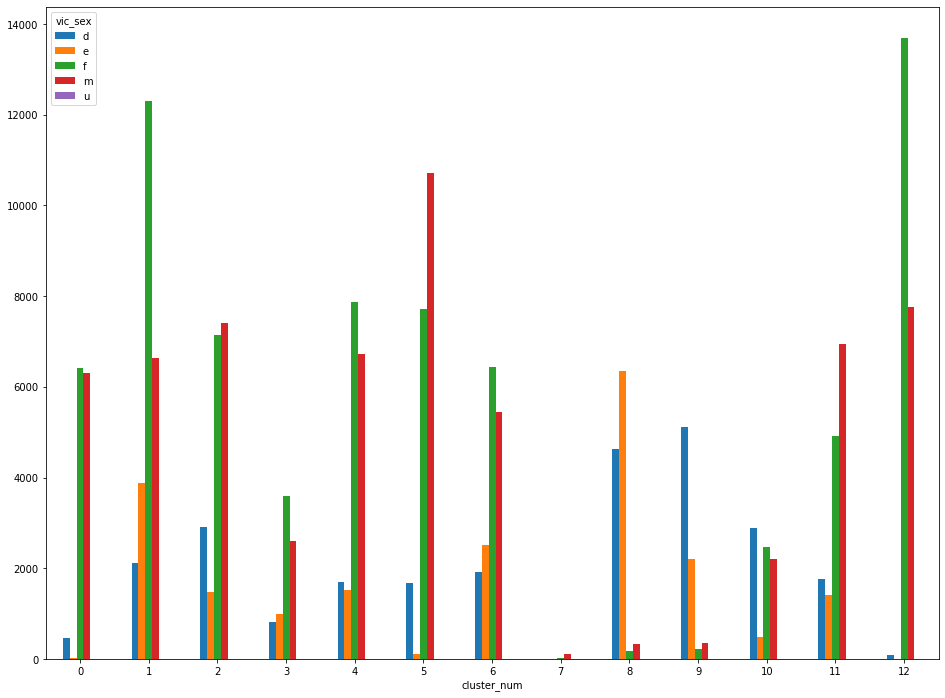

In [80]:
sample.groupby('cluster_num').vic_sex.value_counts().unstack().plot.bar(rot = 0, figsize = (16, 12))

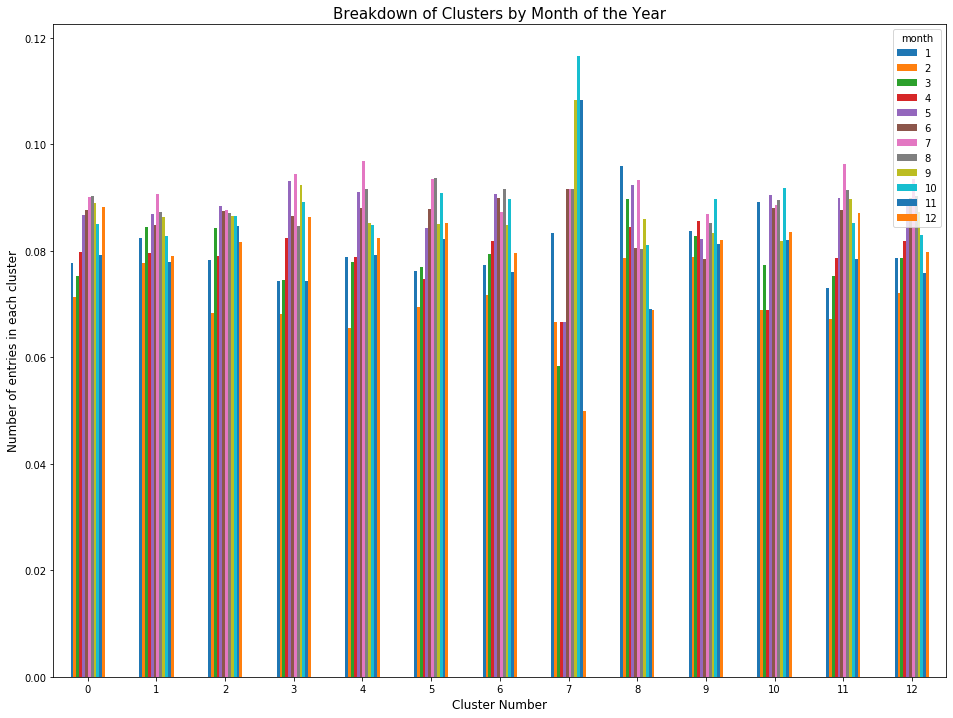

In [85]:
sample.groupby('cluster_num').month.value_counts(normalize = True).unstack().plot.bar(rot = 0, figsize = (16, 12))
plt.title('Breakdown of Clusters by Month of the Year', fontsize = 15)
plt.xlabel('Cluster Number', fontsize = 12)
plt.ylabel('Number of entries in each cluster', fontsize = 12);

With the exception of cluster 7 (which is by far the smallest cluster), this appears to be almost uniformly distributed, so month of the year was likely not a significant source of signal.